# 33 mannfjöldaspá fyrir Ísland


## 1. setup og stofnstærð 2020-2050


In [33]:
import numpy as np
import numpy.linalg as la

f = "https://cs.hi.is/python/aldursdreifing.txt"
all = np.loadtxt(f, skiprows=1, encoding="UTF-8").T

aldur = np.array(all[0])  # aldur fólks
fjold = np.array(all[1])  # upphafsfjöldi
danar = np.array(all[2])  # dánartíðni
faedi = np.array(all[3])  # fæðingartíðni
adumb = np.array(all[4])  # aðfluttir umfr. brottfluttra

leslie = np.zeros((111, 111))
leslie[0] = faedi
for i in range(1, 111):
    leslie[i][i - 1] = 1 - danar[i - 1]


def stofnstaerd(ar):
    return la.matrix_power(leslie, ar) @ fjold


# námunda að næstu heiltölu bara til að fegra outputið
# taflaRaw = [stofnstaerd(i) for i in range(0, 35, 5)]
tafla = [sum(stofnstaerd(i)) for i in range(0, 35, 5)]
for i in range(7):
    print(f"árið {2020+i*5} er stofnfjöldinn {round(tafla[i])}")


árið 2020 er stofnfjöldinn 366517
árið 2025 er stofnfjöldinn 398960
árið 2030 er stofnfjöldinn 427764
árið 2035 er stofnfjöldinn 451414
árið 2040 er stofnfjöldinn 470958
árið 2045 er stofnfjöldinn 488622
árið 2050 er stofnfjöldinn 510213


## 2. stofnstærð með innflytjendum


In [34]:
def stofnstaerdInnflyt(ar):
    return sum(la.matrix_power(leslie, ar) @ fjold)

def inf(ar,fjoldi):
    for i in range(ar):
        fjoldi = leslie@fjoldi+adumb
    return fjoldi

taflaInf = [sum(inf(i,fjold)) for i in range(0, 35, 5)]
for i in range(7):
    print(f'árið {2020+i*5} er stofnfjöldinn {round(taflaInf[i])}')


árið 2020 er stofnfjöldinn 366517
árið 2025 er stofnfjöldinn 427620
árið 2030 er stofnfjöldinn 491707
árið 2035 er stofnfjöldinn 556188
árið 2040 er stofnfjöldinn 620108
árið 2045 er stofnfjöldinn 684198
árið 2050 er stofnfjöldinn 754174


## 3

<function matplotlib.pyplot.show(close=None, block=None)>

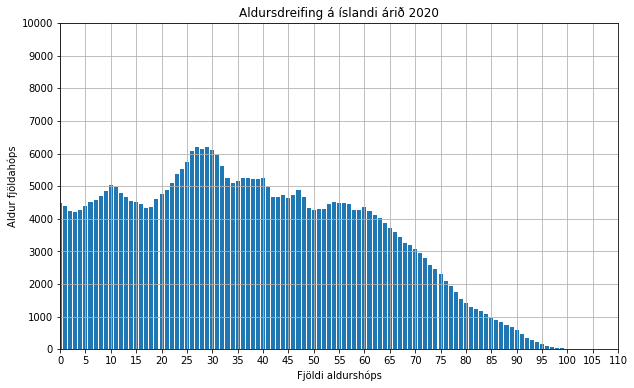

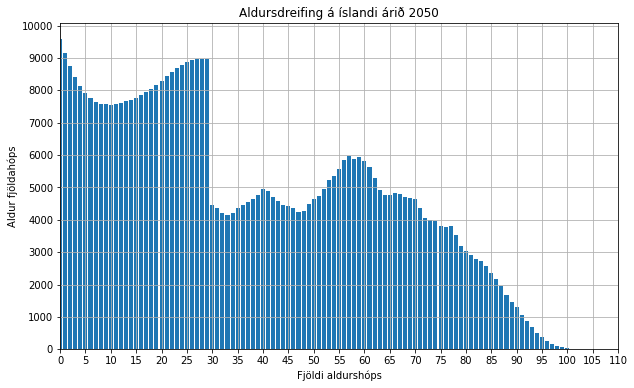

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Aldursdreifing á íslandi árið 2020')
plt.xlabel('Fjöldi aldurshóps')
plt.ylabel('Aldur fjöldahóps')
plt.xlim(0,110)
plt.ylim(0,10000)
plt.xticks(range(0,111,5))
plt.yticks(range(0,11000,1000))
plt.bar(list(range(111)),fjold)
plt.grid(True)
plt.show

plt.figure(figsize=(10,6))
plt.title('Aldursdreifing á íslandi árið 2050')
plt.xlabel('Fjöldi aldurshóps')
plt.ylabel('Aldur fjöldahóps')
plt.xlim(0,110)
plt.xticks(range(0,111,5))
plt.yticks(range(0,11000,1000))
plt.bar(list(range(111)),stofnstaerd(30))
plt.grid(True)
plt.show

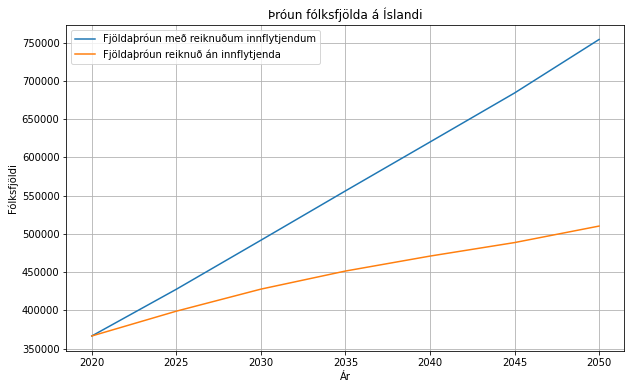

In [36]:
plt.figure(figsize=(10,6))
plt.title('Þróun fólksfjölda á Íslandi')
plt.xlabel('Ár')
plt.ylabel('Fólksfjöldi')
plt.plot(list(range(2020,2055,5)),taflaInf,label='Fjöldaþróun með reiknuðum innflytjendum')
plt.plot(list(range(2020,2055,5)),tafla,label='Fjöldaþróun reiknuð án innflytjenda')
plt.legend()
plt.grid(True)

## 5

Þessar niðurstöður koma mér frekar mikið á óvart.
Ég átti ekki von á því að innflytjendur hefðu svona mikil áhrif á heildarfjölda,
meikar alveg sens þar sem upprunafólksfjöldi er undir 400.000.
Líka áhugavert að sjá að fólki í kringum 20 ára fjölgar og verður í stórum meirihluta í framtíðinni.